In [6]:
#putting matlab data into pandas DF
from scipy.io import loadmat
import pandas as pd
import numpy as np
from skimage.io import imread, imsave
from sklearn import svm, metrics
from skimage.transform import resize
import shutil
import os
from matplotlib import pyplot as plt
import math
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

#Reads mat file and returns a dataframe with matlab IMDb data
def readmat(mat_file):
    data = loadmat(mat_file)
    mdata = data['imdb']
    mdtype = mdata.dtype
    names = [x[0] for x in mdtype.fields.items()]
    ndata = {n: mdata[n][0,0] for n in mdtype.names}
    columns = [n for n, v in ndata.items() if v.size == ndata['dob'].size]
    test = np.concatenate([ndata[c] for c in columns], axis=0)
    test = np.column_stack(test)
    df = pd.DataFrame(test, columns=columns)
    return df

#Crops and save images according to the face location in matfile. 
def face_crop(df):
    photo_wd = os.getcwd() + '/1000_Photos' #location of photos
    new_wd = os.getcwd() + '/Cropped_1000' #folder for new photos

    for index, row in df.iterrows():
        path = np.array2string(row['full_path']).strip("[]").strip('\'')[2:]
        img = imread(photo_wd + path)
        face_location = row['face_location'][0].astype(int)
        face_image = img[face_location[1]:face_location[3],face_location[0]:face_location[2]]
        imsave(new_wd + path, face_image)
               
#Zips photos in a folder
def zip_photos():
    zipfile_name = '' #name for zip file
    folder = os.getcwd() + '' #WD of files
    shutil.make_archive(zipfile_name, 'zip', folder)
    
#Unpacks an archive
def unpack(archive):
    extract_dir = ''
    try:
        shutil.unpack_archive(archive, extract_dir = extract_dir)
        print('Archive extracted')
    except FileNotFoundError:
        print('File or folder not found')
    
#Crops, resizes and appends images, gender to list
def prep_images(df):
    imgs = []
    flat_data = []
    genders = []
    cwd = os.getcwd() + '/1000_Photos'

    for index, row in df.iterrows():
        path = np.array2string(row['full_path']).strip("[]").strip('\'')[2:]
        img = imread(cwd+path, as_gray=True)
        face_location = row['face_location'][0].astype(int)
        face_image = img[face_location[1]:face_location[3],face_location[0]:face_location[2]]
        face_image = resize(face_image, (100,100), anti_aliasing=True, mode='reflect')
        flat_data.append(face_image.flatten())
        imgs.append(face_image)
        genders.append(row['gender'])
        
        if index % 100 == 0:
            print(index, ' completed')
            
    return flat_data, genders

def svm_clf(genders, flat_data):
    flat_data = np.array(flat_data)

    genders = np.array(genders)
    for i, gender in enumerate(genders):
        if math.isnan(gender):
            genders[i] = 1.0

    print('Males: ', list(genders).count(1.0))
    print('Females: ', list(genders).count(0))


    x_train, x_test, y_train, y_test = train_test_split(
        flat_data, genders, test_size=0.3,random_state=100)


    svc = svm.SVC(gamma=0.001, class_weight='balanced')
    clf = svc.fit(x_train, y_train)


    y_pred = clf.predict(x_test)


    print("Classification report for - \n{}:\n{}\n".format(
        clf, metrics.classification_report(y_test, y_pred)))

    test_acc = accuracy_score(y_test, y_pred)
    train_acc = clf.score(x_train, y_train)

    print('Testing Accuracy: ', test_acc)
    print('Training Accuracy: ', train_acc)
    
    return test_acc, train_acc 

#mat_file = 'imdb_1000.mat'
#df = readmat(mat_file)
#flat_data, genders = prep_images(df)
test_acc_1000, train_acc_1000 = svm_clf(genders, flat_data)

Males:  721
Females:  279
Classification report for - 
SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

        0.0       0.40      0.67      0.50        76
        1.0       0.86      0.67      0.75       224

avg / total       0.74      0.67      0.69       300


Testing Accuracy:  0.6666666666666666
Training Accuracy:  0.8128571428571428


0  completed
1  completed
2  completed
3  completed
4  completed
5  completed
6  completed
7  completed
8  completed
9  completed
10  completed
11  completed
12  completed
13  completed
14  completed
15  completed
16  completed
17  completed
18  completed
19  completed
20  completed
21  completed
22  completed
23  completed
24  completed
25  completed
26  completed
27  completed
28  completed
29  completed
30  completed
31  completed
32  completed
33  completed
34  completed
35  completed
36  completed
37  completed
38  completed
39  completed
40  completed
41  completed
42  completed
43  completed
44  completed
45  completed
46  completed
47  completed
48  completed
49  completed
50  completed
51  completed
52  completed
53  completed
54  completed
55  completed
56  completed
57  completed
58  completed
59  completed
60  completed
61  completed
62  completed
63  completed
64  completed
65  completed
66  completed
67  completed
68  completed
69  completed
70  completed
71  completed
72

554  completed
555  completed
556  completed
557  completed
558  completed
559  completed
560  completed
561  completed
562  completed
563  completed
564  completed
565  completed
566  completed
567  completed
568  completed
569  completed
570  completed
571  completed
572  completed
573  completed
574  completed
575  completed
576  completed
577  completed
578  completed
579  completed
580  completed
581  completed
582  completed
583  completed
584  completed
585  completed
586  completed
587  completed
588  completed
589  completed
590  completed
591  completed
592  completed
593  completed
594  completed
595  completed
596  completed
597  completed
598  completed
599  completed
600  completed
601  completed
602  completed
603  completed
604  completed
605  completed
606  completed
607  completed
608  completed
609  completed
610  completed
611  completed
612  completed
613  completed
614  completed
615  completed
616  completed
617  completed
618  completed
619  completed
620  compl

Males:  721
Females:  279
Classification report for - 
SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

        0.0       0.40      0.67      0.50        76
        1.0       0.86      0.67      0.75       224

avg / total       0.74      0.67      0.69       300


Testing Accuracy:  0.6666666666666666
Training Accuracy:  0.8128571428571428


IndexError: too many indices for array

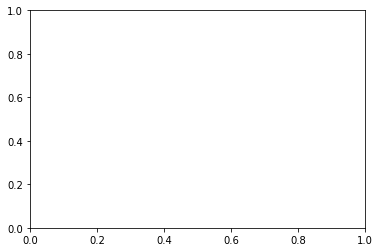